In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.head()

life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure',
            'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
life.dropna(inplace = True)

X = life[['Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 3)
X = poly_feature.fit_transform(X)

Test MSE : 20.229604448090107


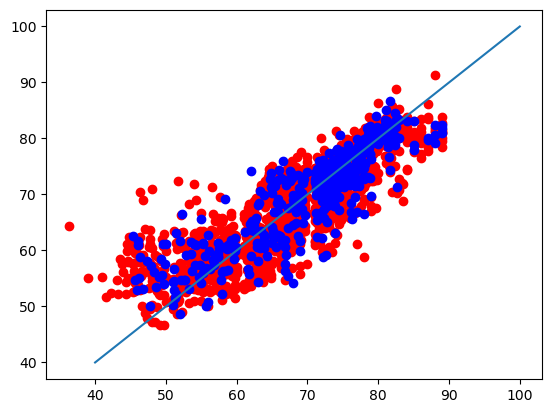

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_hat_train = lin_model.predict(X_train)
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_train, y_hat_train, color = 'r')
plt.scatter(y_test, y_hat_test, color = 'b')
plt.plot([40, 100], [40, 100])
print('Test MSE :', mse(y_test, y_hat_test))

In [12]:
print('Train MSE :', mse(y_train, y_hat_train))

Train MSE : 23.807115574387222


In [13]:
X.shape

(2306, 84)

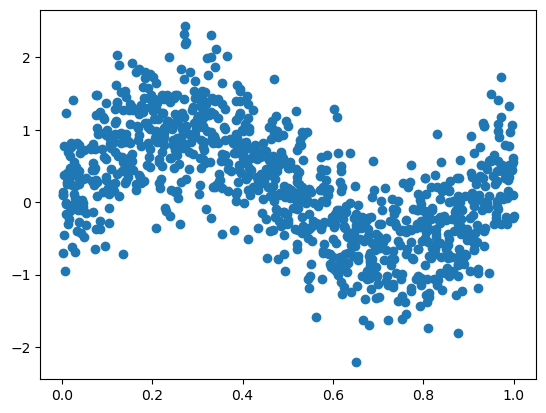

In [15]:
#LAB 6-1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'nonlinear.csv')

plt.scatter(df['x'], df['y'])

In [17]:
from sklearn.preprocessing import PolynomialFeatures
X = df['x'].to_numpy()
y = df['y'].to_numpy()
X = X.reshape(-1, 1) #입력을 2차원 벡터가 되게 한다. shape = (m, 1)
feature_cubic = PolynomialFeatures(degree = 3)
X_3 = feature_cubic.fit_transform(X)

In [21]:
lin_model = LinearRegression()
domain = np.linspace(0, 1, 100).reshape(-1, 1) # 입력을 2차원 벡터로 변형

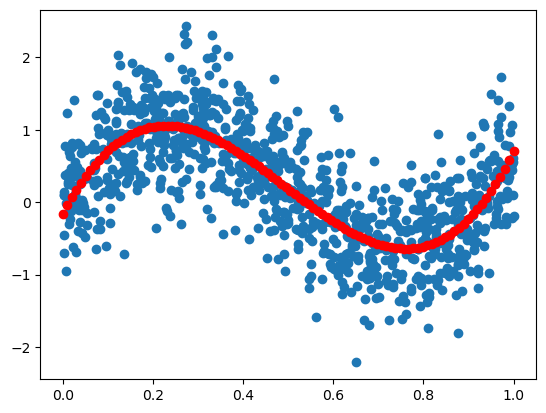

In [23]:
lin_model.fit(X_3, y)
domain_3 = feature_cubic.fit_transform(domain)
predictions = lin_model.predict(domain_3)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, predictions, color = 'r')